# 导入所需的库

In [1]:
from pynq import Overlay
from pynq import Xlnk
import pynq.lib.dma
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 手动归一化（无法在PYNQ里运行torchvision.transform）

In [2]:
def my_transform(img):
    img = img.resize((28,28))
    im_data = np.array(img).astype(np.float32)
    im_data = im_data.transpose(2,0,1)
    for i in range(im_data.shape[0]):
        im_data[i,:,:] = (im_data[i,:,:] - np.mean(im_data[i,:,:])) / np.std(im_data[i,:,:])
    return im_data

# 载入Overlay，定义dma的输入输出通道

In [3]:
overlay = Overlay('overlay/cnn_robot.bit')
xlnk = Xlnk()
x = xlnk.cma_array(shape=(3,28,28), dtype=np.float32)
y = xlnk.cma_array(shape=(6), dtype=np.float32)

input_ch = overlay.axi_dma_0.sendchannel
output_ch = overlay.axi_dma_0.recvchannel

# 载入图片，实际测试时应为摄像头拍到的图片

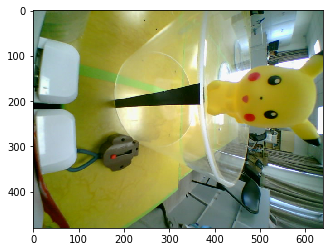

In [4]:
img = Image.open('../common/data/pikaqiu/0.jpg')
plt.imshow(img)
plt.show()
img_data = my_transform(img)
for i in range(3):
    for j in range(28):
        for k in range(28):
            x[i][j][k] = img_data[i][j][k]

# 得到输出

In [5]:
input_ch.transfer(x)
output_ch.transfer(y)
output_ch.wait()
print('y', y)
print('pred class: ', np.argmax(y))

y [ 6.65158701 -5.06578064 -2.00133109 -0.7638064  -3.00370479  0.09637585]
pred class:  0


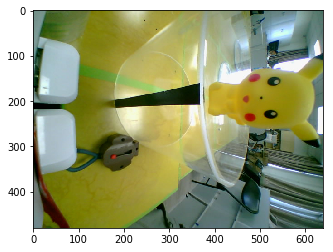

y [ 19.8355732  -14.73944378  -5.64264584  -3.01300693  -9.12787437
   0.28770691]
pred class:  0


In [6]:
img = Image.open('../common/data/pikaqiu/5.jpg')
plt.imshow(img)
plt.show()
img_data = my_transform(img)
for i in range(3):
    for j in range(28):
        for k in range(28):
            x[i][j][k] = img_data[i][j][k]

input_ch.transfer(x)
output_ch.transfer(y)
output_ch.wait()
print('y', y)
print('pred class: ', np.argmax(y))

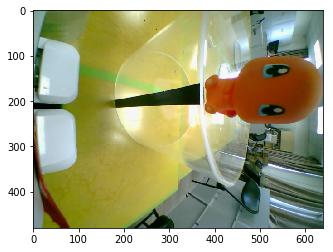

y [ 34.52447891 -40.67733765 -17.78183556   9.50299263 -11.92420197
   1.16660106]
pred class:  0


In [7]:
img = Image.open('../common/data/xiaohuolong/0.jpg')
plt.imshow(img)
plt.show()
img_data = my_transform(img)
for i in range(3):
    for j in range(28):
        for k in range(28):
            x[i][j][k] = img_data[i][j][k]

input_ch.transfer(x)
output_ch.transfer(y)
output_ch.wait()
print('y', y)
print('pred class: ', np.argmax(y))

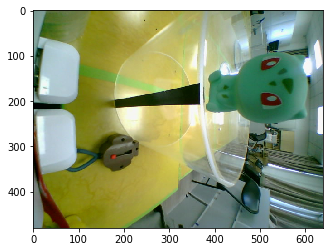

y [ 47.90127945 -58.88511276 -28.12202835   8.39048767 -17.08698845
   4.83759069]
pred class:  0


In [8]:
img = Image.open('../common/data/miaowazhongzi/2.jpg')
plt.imshow(img)
plt.show()
img_data = my_transform(img)
for i in range(3):
    for j in range(28):
        for k in range(28):
            x[i][j][k] = img_data[i][j][k]

input_ch.transfer(x)
output_ch.transfer(y)
output_ch.wait()
print('y', y)
print('pred class: ', np.argmax(y))